# **추천시스템**

## 추천시스템 유형 
**1. 내용 기반 필터링(CBF)**  
- 콘텐츠의 **유사도**를 기반으로 사용자에게 추천  
- 사용자가 이용/선택한 아이템과 유사한 아이템 추천  

**2. 협업 필터링(collaborative filtering)**  
- 다수의 사용자로부터 얻은 선호도 정보를 기반으로 사용자에게 추천  
- 비슷한 관심사를 가진 한 사용자의 정보를 이용하여 다른 사용자에게 추천  
  
**3. 하이브리드 필터링**  
- 2가지 이상의 추천시스템 알고리즘을 조합하여 만들어진 알고리즘  

## 협업 필터링(CF)의 구현 방식   
**1. 기억 기반 CF**  
- 실제 평점 데이터를 메모리에 저장 -> 유사도 계산  
  - user-based:
    - 특정 사용자와 유사한 취향의 사용자가 선호한 아이템 추천   
    - 나와 다른 모든 사용자 간의 유사도(코사인 유사도 등) 계산 -> 유사도 높은 상위 k명 선정  
    - 사용자 많아질수록 계산량이 폭발적으로 늘어남(확장성 문제), 사용자 취향이 매우 다양하여 유사도 정확히 찾기 어려움  
  - item-based: 
    - 사용자가 선호한 아이템과 유사한 다른 아이템 추천   
    - 모든 아이템 쌍 간의 유사도 계산 -> 내가 선호한 아이템과 유사한 아이템 추천  
    - 아이템은 사용자보다 변화가 적어 유사도 행렬이 비교적 안정적  

**2. 기억 기반 협업 필터링의 한계** 
  1. 데이터 희소성 문제  
    - 대부분의 사용자는 전체 아이템 중 극히 일부에만 평점 -> User-Item 행렬의 대부분이 비어있기 때문에, 유사도를 계산할 만한 공통의 아이템이 부족  
  2. 확장성 문제  
    - 사용자와 아이템의 수가 증가할수록, 유사도를 계산해야 하는 쌍의 수가 기하급수적으로 늘어남  
  3. 새로운 아이템 문제  
    - 새로운 아이템은 상호작용 이력이 없으므로, 어떤 유저와도 유사도를 계산할 수 없어 추천될 기회가 없음  

**3. 모델 기반 협업 필터링의 등장** 
  - 관측된 평점 데이터로부터 유저와 아이템의 숨겨진 취향/특성(잠재 요인)을 학습하고, 이 잠재 요인을 이용하여 비어있는 평점을 예측  
  - 유사도 계산 X -> 간단한 내적 연산  

## 모델 기반 추천시스템  
- **잠재 요인**  
  - 사용자-아이템 상호작용 행렬에 숨겨져 있는, 사용자의 취향이나 아이템의 특성을 설명하는 **숨겨진 차원**    
  - 모델이 스스로 학습한 추상적인 개념 (사후해석)-> 사람은 명시적으로 이해 X    
    - 예시) $\ R_{3 \times 3} \approx P_{3 \times 2} \times Q^T_{2 \times 3}$    
    유저 잠재 요인 행렬 $P$와 아이템 잠재 요인 행렬 $Q^T$ 로 분해  
    평점: 두 잠재 요인 벡터의 내적  

- **행렬 분해**  
  - 가설: $R$에 녹아 있는 평점$(r_{u, i})$은 결국 사용자 $u$의 잠재 요인 벡터 $p_u$와 아이템 $i$의 잠재 요인 벡터 $q_i$의 내적 결과이다.  
  - 목표: 관측된 평점을 가장 잘 재현하는 가장 적절한 잠재 요인의 개수 $k$를 찾고, $R \approx P \times Q^T$가 되도록 $P$와 $Q^T$를 학습하는 것  
  - 행렬 분해 방식
    1. SVD(특잇값 분해)  
    - $A=UΣV^T$  
      - $A$ : 원래의 $m×n$ 행렬 (사용자-아이템 평점 행렬)
      - $U$ :  $m×m$ 직교 행렬 (사용자 관련 정보)
      - $Σ$ : $m×n$ 대각 행렬 (가장 중요한 정보: **특잇값**)  
    - 특잇값: 각 특잇값은 해당 차원(잠재 요인)이 원래 행렬 $A$에서 얼마나 많은 정보량 또는 중요도를 설명하는지 나타냄  
    2. SGD  
    - SGD의 목표: 목적함수, 관측된 평점($r_{u, i}$)과 예측 평점($\hat{r}_{u, i}$) 사이의 오차를 최소화하는 것  
    - 한계: 데이터 희소성 처리 불가(비어있는 행렬에 적용 불가), 계산 복잡성  
    3. NMF  
    - 분해된 두 개의 행렬 $P$와 $Q^T$의 모든 원소가 0 이상이어야 한다는 제약 조건을 추가한 행렬 분해 기법  
    - 장점: 각 잠재 요인 값이 유저의 선호도나 아이템의 특성 강도를 나타낸다고 직관적으로 해석 가능  

cf) MF의 한계와 딥러닝의 등장  

| MF의 근본적 한계 | 내용 | 딥러닝의 해법 |
| --- | --- | --- |
| **선형성의 한계** | 평점 예측($\hat{r}_{u, i}$)이 단순한 잠재 벡터의 내적(Dot Product)으로만 이루어짐 | 비선형 활성화 함수(ReLU 등)를 가진 신경망을 사용하여 복잡한 패턴을 학습 |
| **불확실성 무시** | 사용자 취향을 단 하나의 벡터값(Point Estimate)으로만 표현 | **확률 분포**로 취향을 모델링하여 데이터의 불확실성을 반영 |

## VAE 기반 협업 필터링  

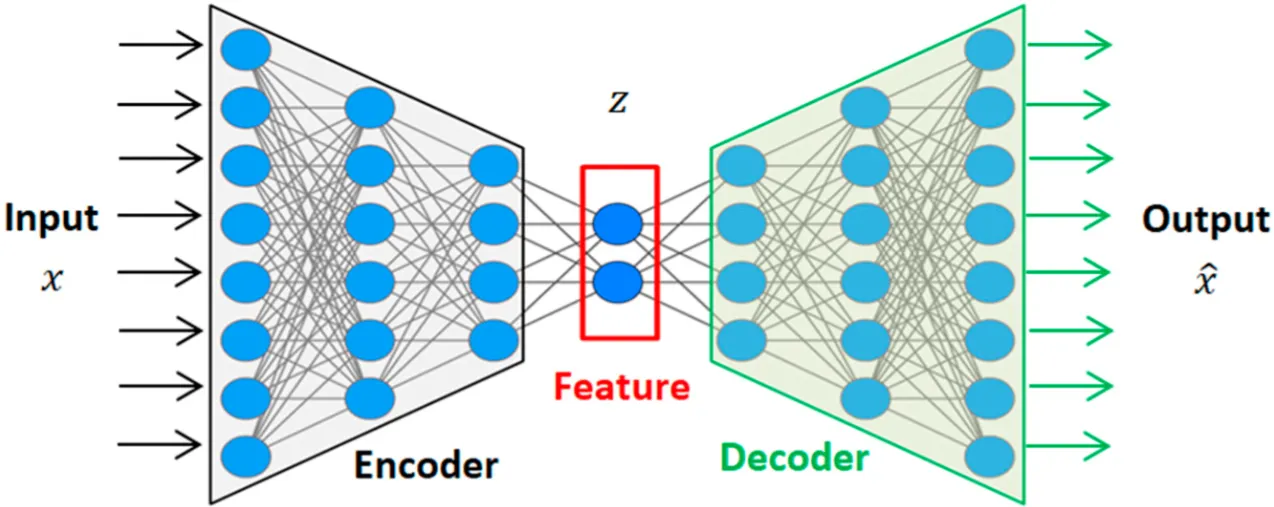

- 사용자의 아이템 상호작용 벡터(예: 구매/시청 이력)를 입력으로 받아, 잠재 공간에서 재구성하도록 VAE를 학습하는 방식  
- **인코더**: 사용자 이력을 잠재변수 z 분포로 매핑 / **디코더**: z로부터 아이템 분포를 복원  
- 장점: 
  - 기존 MF처럼 단일 포인트 벡터가 아니라 확률적 잠재 분포로 사용자 선호를 모델링 하여 불확실성을 반영  
  - 희소한 상호작용 데이터에서도 강건  
- 목적함수  
$\mathcal{L}(x; \theta, \phi) = \underbrace{E_{q_\phi(z|x)} [ \log p_\theta(x|z) ]}_{\text{재구성 오차 최소화 (Reconstruction Loss)}} - \underbrace{D_{\text{KL}}(q_\phi(z|x) || p(z))}_{\text{잠재 공간 정규화 (KL Divergence)}}$   

  **1.  재구성 오차 최소화 (첫 번째 항):**  
    - 목표: 디코더가 잠재 벡터 $z$를 사용하여 원래 입력 $x$를 최대한 비슷하게 복원하도록 함 (AE의 역할과 동일)  

  **2.  KL Divergence 항 (두 번째 항):**  
    - 목표: 인코더가 출력하는 잠재 분포 $q(z|x)$가 사전 분포 $p(z)$ (표준 정규 분포)와 유사하도록 함  
- **VAE-CF의 주요 장점**  
  - KL Divergence를 통해 잠재 공간을 정규화하여 데이터 보간 능력이 뛰어나며, 희소성 문제에 효과적으로 대응  
  - 신경망 구조를 통해 MF의 한계였던 복잡하고 비선형적인 패턴을 학습하여 추천 성능을 극대화  


## GNN 기반 사용자 선호 예측  
- GNN (Graphic Neural Network)  
- 그래프: 노드(Node)와 그 노드를 잇는 선(Edge)을 모아 구성한 자료 구조  

   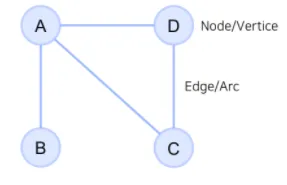
 
  - 관계, 상호작용과 같이 추상적인 개념 다루기에 적합  
  - non-euclidean space도 표현하고 학습 가능  

<br>

- **GNN의 구조**

  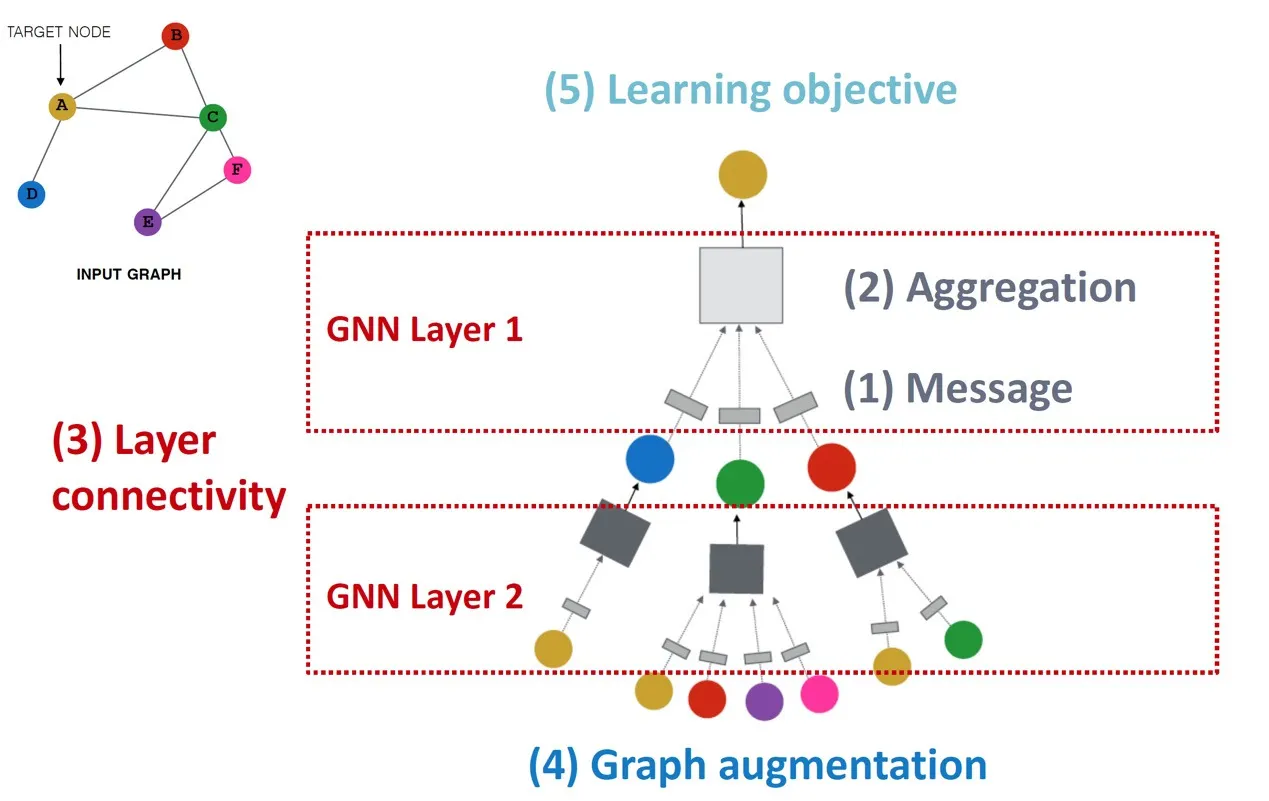

  1. **[그래프 구조 생성]** 노드는 개별 객체, 엣지는 객체 간 관계나 연결성을 의미함  
    - 노드와 엣지를 정의한 후, 각각의 피처를 담아 표현  

  2. **[메시지 패싱]** 각 노드가 이웃 노드로부터 정보를 받아 전달  
    - GNN 모델이 k개의 레이어로 구성되어 있다면, k번의 (생성-집계-갱신) 과정 반복  
     1. **[메시지 생성]** 이웃 노드로에 전달할 메시지 생성  
      - 메시지: 각 노드가 이웃에게 보내는 자신의 정보(임베딩)  
     2. **[집계]** 받은 여러 이웃의 메시지를 하나로 합침   
      - aggregator 이용하여 여러 이웃 노드에서 받은 메시지를 하나의 벡터로 통합
     3. **[갱신]** 자신의 노드 상태를 업데이트함   
      - 집계된 이웃 정보와 자신의 이전 상태를 결합해 새로운 임베딩을 계산  

  3. **[최종 출력]**  

<br>

- **GNN 장단점**  
  - 장점:  
    1. 고차원 협업 시그널 포착: 나와 취향이 비슷한 사용자들(이웃)과 내가 본 아이템과 연관된 다른 아이템들의 정보를 직접 반복해서 반영  
    2. 정형화되지 않은 데이터 학습 가능: GNN은 ‘관계’를 학습하기 때문에, 각 노드가 정형화된 데이터로 정의되지 않아도 관계망 속에서 정보를 효과적으로 전파    
    3. Cold Start 문제 완화에 효과적: 노드의 고유 특징과 주변 이웃과의 관계를 활용해 즉시 임베딩 생성 가능  
  - 단점:  
    1. 과평탄화 문제: 모든 노드의 임베딩이 같은 값으로 수렴하는 현상  
    2. 과압축 문제: 층이 깊어질수록 집계하는 이웃의 범위가 기하급수적으로 커지는데, 이를 고정된 크기의 벡터 하나에 모두 압축하려고 하면 정보가 손실될 수 있음  
    3. 계산 복잡도 증가  
    4. 해석의 어려움: 순서 반영 X  

## Transformer 기반 추천 시스템  
- 순차적 정보를 다루는 데 한계 -> transformer  
  - GNN의 순차적 한계  
    1. 지역적 정보 전파의 한계: 정보가 여러 단계를 거치며 희석될 수 있 
    2. 장기 의존성 문제: GNN은 정의된 그래프 구조(이웃)에 의존  

- '문맥'에 따라 아이템의 의미가 달라짐  
- 핵심의도 포착: 사용자의 행동이 길어질 때, 가장 최근의 행동이 아니라 멀리 떨어진 과거의 행동이 다음 행동의 결정적 '키(Key)'가 될 수 있음  

### self attention  
- 시퀀스 내 모든 아이템 간의 관계를 거리에 상관없이 동시 계산 -> 장기의존성 문제 해결  
- 동작원리:  
  - **Query (Q):** 관련 정보를 요청하는 주체   
  - **Key (K):** 정보의 종류를 나타내는 '색인' 또는 '태그'    
  - **Value (V):** 정보의 '내용물'  
- 연산 과정:  
  1. Attention Score 계산 (Q·K): Query가 모든 Key와 얼마나 유사한지 유사도(주로 내적)를 통해 '관련성 점수' 계산  
  2. 가중합 (Weighted Sum) (Score·V): 이 '관련성 점수'를 (Softmax를 거쳐) '가중치'로 변환  
  3. 가중평균: 이 가중치를 각 아이템의 Value(실제 내용물)에 곱하여 모두 더함  

### transformer 기반 주요 추천 시스템 모델  
1. **SASRec (Self-Attentive Sequential Recommendation)**  

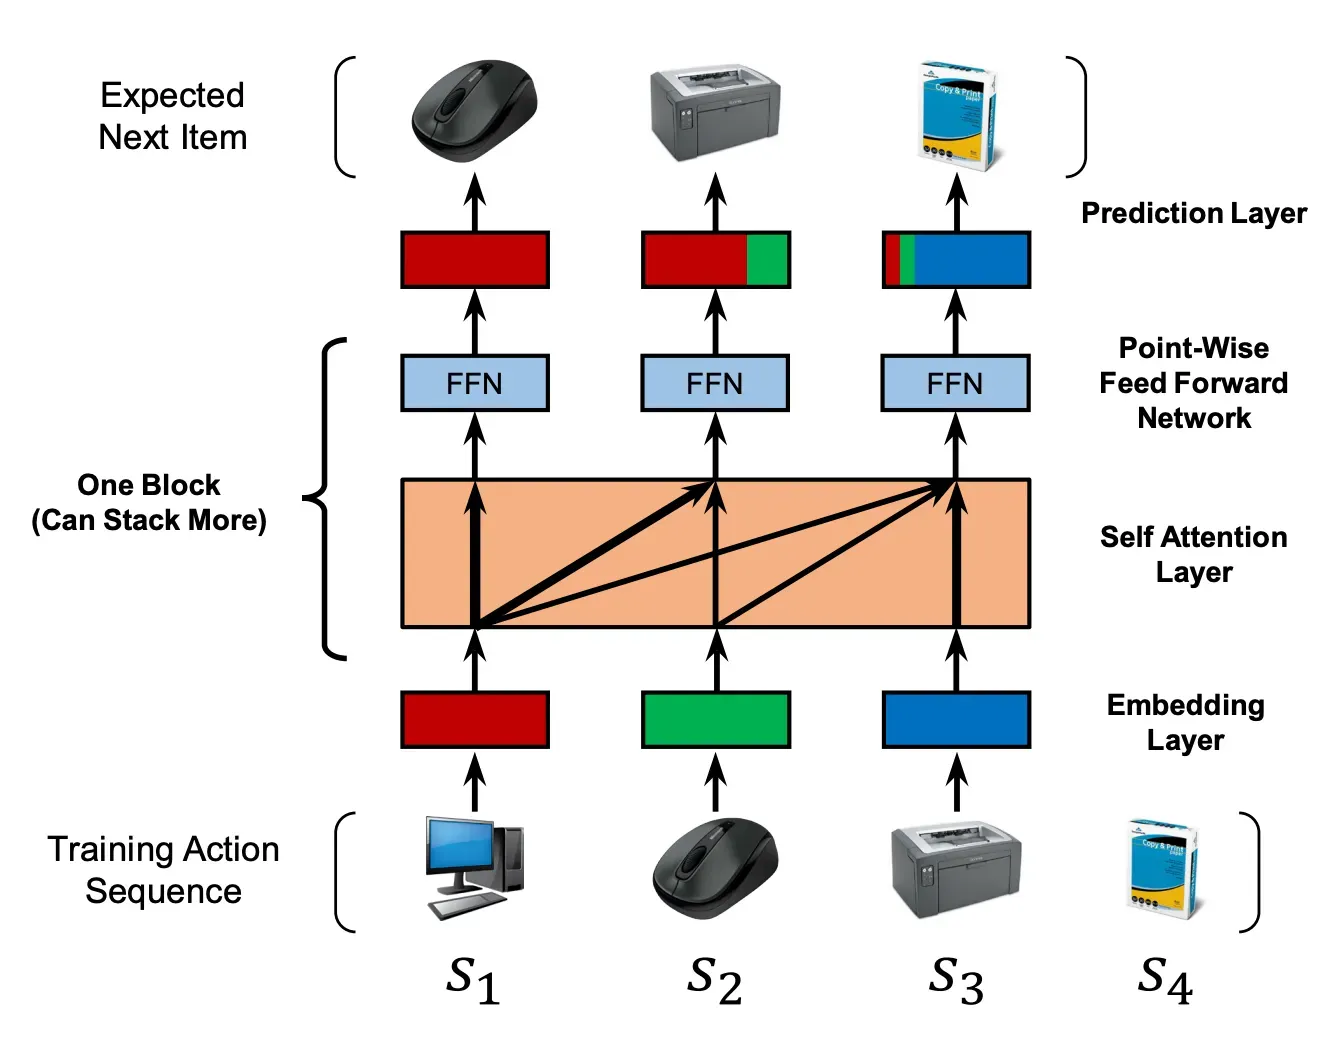

  - Training Action Sequence (학습용 행동 순서)  
    - 모델의 입력 데이터, 사용자가 과거에 상호작용한 아이템들의 순서  
  - Embedding Layer (임베딩 레이어)  
    - 각 아이템을 고유한 숫자 벡터(Vector)로 변환  
  - Self Attention Layer (셀프 어텐션 레이어)  
    - 시퀀스 내의 아이템 간의 관계를 학습하는 곳  
  - Point-Wise Feed Forward Network (FFN)  
    - 셀프 어텐션을 통과한 정보를 개별적으로 한 번 더 처리하여(비선형 변환) 예측 능력을 높임  
  - Prediction Layer (예측 레이어)  
    - 모델이 학습한 내용을 바탕으로, 시퀀스의 다음 단계에서 등장할 아이템이 무엇인지 예측  
- 어텐션 계산: 현재 아이템은 '오직 과거의 아이템'들만 참조할 수 있음  
- **특징:**  
    - 과거 정보만 활용하여 시간의 흐름을 명확하게 반영  
    - 학습 과정에서 사용자의 '다음 행동'을 예측하는 데 초점이 맞춰져 있음  
- **단점:**  
    - 계산량 많음  
    - 단방향성  

  <br>

2. **BERT4Rec (BERT for Recommendation)**  

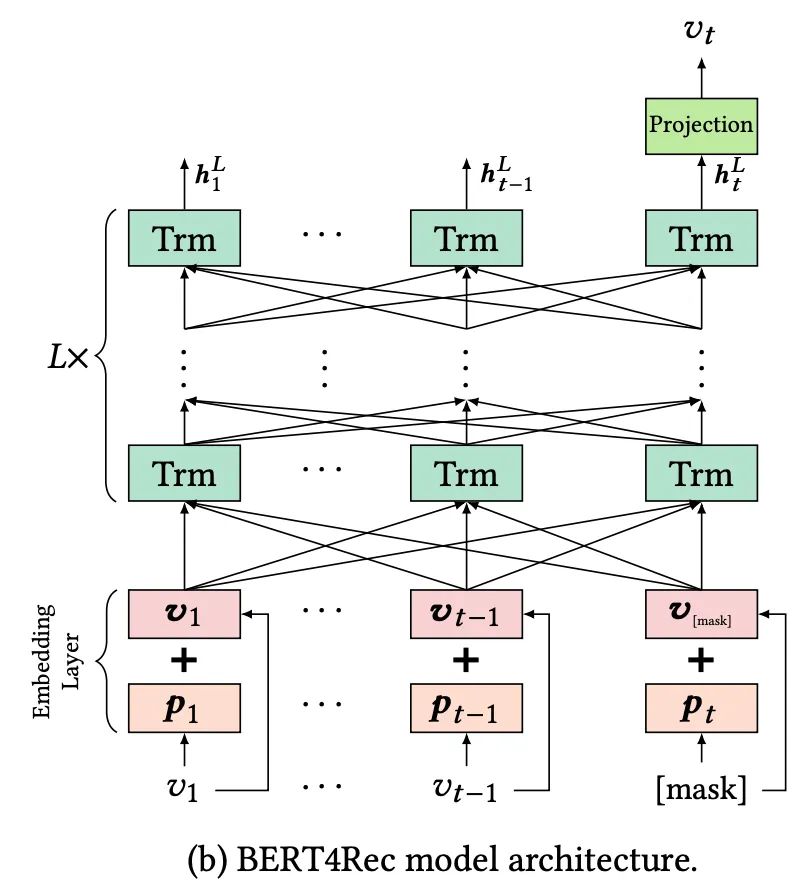

  - 입력 (Input)  
    - 사용자 행동 시퀀스 중 일부를 [mask] 토큰으로 의도적 치환  
  - 임베딩 레이어 (Embedding Layer)  
    - 아이템 임베딩  
    - 포지셔널 임베딩  
  - 트랜스포머 블록  
    - **양방향(Bi-directional**) 셀프 어텐션 적용  
  - 예측  
    - Projection 레이어를 거쳐, 원래 아이템($v_t$)이 무엇이었는지 예측

- **특징:**  
  - 아이템의 양방향 문맥(과거와 미래)을 모두 고려  
  - 학습 과정에서 시퀀스 전체의 선호도를 파악하는 데 더 초점이 맞춰져 있음  


## LLM  
- LLM(Large Language Models): 추천을 점수 계산이 아닌 문장으로 출력  
- P5 / TALLRec  
  - **P5** : 모든 추천 과제(랭킹, 다음 아이템 예측, 설명 생성 등)를 LLM이 풀 수 있도록 '하나의 거대한 텍스트 프롬프트' 문제로 통일시킨 모델  
  -**TALLRec** : P5처럼 처음부터 다 학습시키긴 비싸니까, 이미 잘 만들어진 범용 LLM(e.g., LLaMA)을 추천'작업에 맞게 효율적으로 튜닝(Tuning)하는 프레임워크  

### 앞으로의 고민  
1. 인기 편향: 추천 시스템이 소수의 인기 아이템을 과도하게 노출하는 반면, 다수의 비인기 아이템이 받아야 할 관심을 받지 못하는 현상  
2. 설명 가능성: 추천의 근거를 제시할 수 있어야 함   
3. 비용 문제-> 선형 기반 추천 시스템과 병행 사용   
  - 선형 모델 → 빠르고 안정적, 해석 용이
  - 딥러닝 / LLM → 강력하지만 무겁고 복잡
  1. 후보군 생성 -> 선형 모델  
    - 압도적인 속도 : 딥러닝 모델로 수백만 개 아이템 전체에 대해 실시간으로 점수를 매기는 것은 불가능. 선형 모델은 계산이 단순하여 빠르게 처리 가능  
    - 비용 효율성 : 학습에 필요한 비용이 훨씬 적음  
  2. 순위 매기기 -> 딥러닝 모델  
    - 높은 정확도 : 추려진 아이템들을 대상으로 복잡한 딥러닝 모델을 사용해 비선형성, 순서, 관계 등 모든 문맥 정보를 총동원하여 최고의 정확도를 뽑아냄  
    - 복잡한 패턴 학습 : MF가 놓치는 복잡한 사용자-아이템 상호작용 포착